['TV', 'Husuma', 'Chabudai', 'Chabudai', 'Chabudai', 'TV', 'Husuma', 'TV', 'TV', 'Husuma', 'Chabudai', 'TV', 'Husuma', 'Chabudai', 'TV', 'Husuma', 'Chabudai', 'TV', 'Husuma', 'Chabudai', 'TV', 'TV', 'TV', 'Husuma', 'TV', 'TV', 'TV', 'Husuma', 'Chabudai', 'TV', 'TV', 'Husuma', 'TV', 'TV', 'TV', 'Husuma', 'Chabudai', 'TV', 'Husuma', 'TV', 'Husuma', 'TV', 'TV', 'Husuma', 'TV', 'TV', 'TV', 'TV', 'Husuma', 'TV', 'Husuma', 'TV', 'TV', 'Husuma', 'TV', 'Husuma', 'TV', 'TV', 'TV', 'Husuma', 'TV', 'TV', 'TV', 'Husuma', 'Chabudai', 'Chabudai', 'TV', 'TV', 'Husuma', 'TV', 'TV', 'TV', 'Husuma', 'TV', 'Husuma', 'TV', 'TV', 'TV', 'Husuma', 'TV', 'Husuma', 'TV', 'Husuma', 'Chabudai', 'TV', 'TV', 'TV', 'TV', 'TV', 'Husuma', 'Chabudai', 'TV', 'Husuma', 'Chabudai', 'TV', 'Husuma', 'Chabudai', 'Husuma', 'TV', 'TV', 'TV', 'Husuma', 'TV', 'Husuma', 'Husuma', 'TV', 'Husuma', 'TV', 'Husuma', 'TV', 'TV', 'TV', 'TV', 'Husuma', 'TV', 'Husuma', 'Husuma', 'TV', 'Husuma', 'TV', 'Husuma', 'TV', 'Husuma', 'Chabudai',

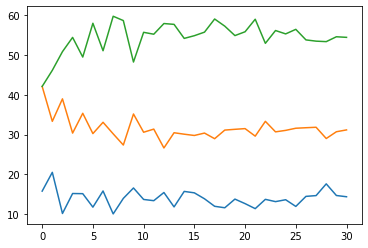

In [8]:
import numpy as np
import random as rm
import sys
import matplotlib.pyplot as plt

# The statespace
states = ["Chabudai","Husuma","TV"]

transitionName = [["CC","CT","CH"],["HH","HT","HC"],["TT","TH","TC"]]
transitionMatrix = [[0.2,0.5,0.3],[0.1,0.6,0.3],[0.5,0.5,0.0]]

alist = []

def generate_sequence(days, cPos):
    # Choose the starting state
    currentPosition = cPos
    alist.append(currentPosition)
    #print("Start state: " + currentPosition)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [currentPosition]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if currentPosition == "Chabudai":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "CC":
                prob = prob * 0.2
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "CT":
                prob = prob * 0.5
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
            else:
                prob = prob * 0.3
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
                
        elif currentPosition == "Husuma":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "HC":
                prob = prob * 0.3
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "HT":
                prob = prob * 0.6
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
            else:
                prob = prob * 0.1
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
                
        elif currentPosition == "TV":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "TC":
                prob = prob * 0.0
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "TH":
                prob = prob * 0.3
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
            else:
                prob = prob * 0.5
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
        i += 1  


#args = sys.argv
startPosition="TV"

LENGTH = 621
counter = 0

TV_seq = []
Chabudai_seq = []
Husuma_seq = []

for i in range(1,LENGTH,2):
    LEN = i - 1
    alist = []
    
    generate_sequence(LEN, startPosition)

    counter = counter + 1
    
    if counter % 10 == 0:
        sum = alist.count('Chabudai') + alist.count('Husuma') + alist.count('TV') 
        Chabudai_seq.append((alist.count('Chabudai'))/sum*100)
        Husuma_seq.append((alist.count('Husuma'))/sum*100)
        TV_seq.append((alist.count('TV'))/sum*100)
    
    rstring = '' 
    for i in alist:
        rstring = rstring + i[0]
    #print(rstring)

    
print(alist)    

LChabudai_seq = "".join([str(_) + "->" for _ in Chabudai_seq])
LHusuma_seq = "".join([str(_)  + "->" for _ in Husuma_seq])
LTV_seq = "".join([str(_)  + "->" for _ in TV_seq])

print(" ")
print("Cの定常確率:" + LChabudai_seq)
print(" ")
print("Hの定常確率:" + LHusuma_seq)
print(" ")
print("Tの定常確率" + LTV_seq)

plt.plot(Chabudai_seq)
plt.plot(Husuma_seq)
plt.plot(TV_seq)
plt.show()
